In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [15]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
x_trainf = X_train.reshape(60000,28*28)
x_testf = X_test.reshape(10000,28*28)
print(x_trainf.shape)
print(x_testf.shape)

(60000, 784)
(10000, 784)


In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_trainf, y_train, epochs=5)


Epoch 1/5


c:\Users\manoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.7786 - loss: 16.8435
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.8790 - loss: 6.2288
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8837 - loss: 5.5741
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.8838 - loss: 5.4594
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8920 - loss: 5.2268


In [19]:
model.evaluate(x_testf,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8676 - loss: 7.1399


[6.531808853149414, 0.8770999908447266]

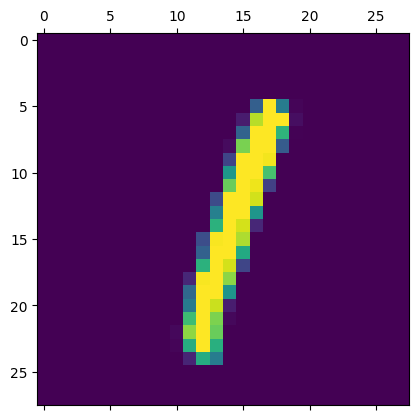

In [20]:
plt.matshow(X_test[5])

In [21]:
y_predicted = model.predict(x_testf)
y_predicted

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


array([[4.2617693e-30, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 2.3129663e-09,
        1.9208851e-01, 5.7641744e-14],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [22]:
np.argmax(y_predicted[5])

np.int64(1)

In [23]:
y_predicted = model.predict(x_testf)
y_predicted_labels = [np.argmax(i) for i in y_predicted] # Convert predictions to discrete class labels
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    2,    0,    0,    0,    0,    0],
       [   3, 1127,    2,    1,    1,    1,    0,    0,    0,    0],
       [ 125,  293,  589,    4,   18,    0,    2,    0,    1,    0],
       [ 120,  116,  329,  434,    4,    7,    0,    0,    0,    0],
       [  23,   13,   39,   17,  884,    0,    3,    2,    1,    0],
       [ 202,   36,   83,  219,  123,  226,    2,    0,    1,    0],
       [  76,   24,  583,   23,   68,   70,  114,    0,    0,    0],
       [  47,   48,  183,  456,  130,   69,    0,   94,    0,    1],
       [  52,  169,  368,  146,   60,  161,    5,    3,   10,    0],
       [  23,   20,   15,  167,  744,   14,    0,   21,    2,    3]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

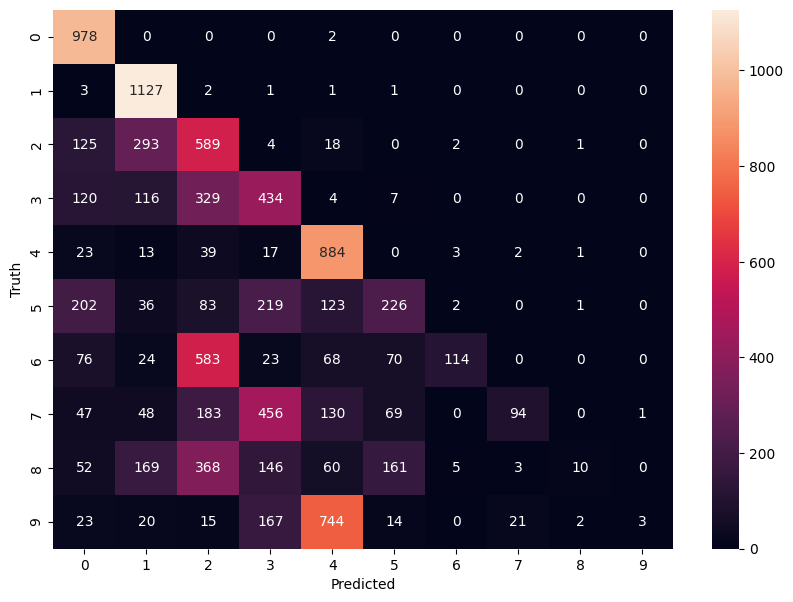

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_trainf, y_train, epochs=5)

Epoch 1/5


c:\Users\manoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8138 - loss: 6.9351
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8993 - loss: 0.4119
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9179 - loss: 0.3183
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9310 - loss: 0.2573
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9394 - loss: 0.2418


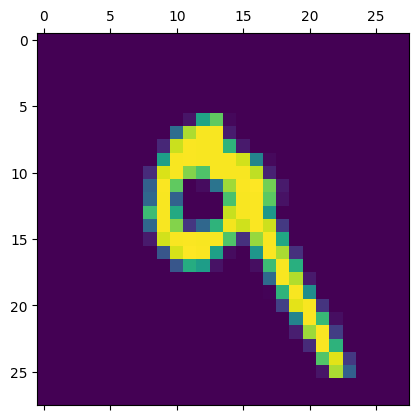

In [26]:
plt.matshow(X_test[7])

In [27]:
new = model.predict(x_testf)
np.argmax(new[7])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step


np.int64(0)